# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [86]:
renda = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
renda['data_ref'] = pd.to_datetime(renda['data_ref'])
renda.dropna(inplace=True)
renda


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [73]:
renda_filtro = renda.loc[((renda['tipo_renda'] == 'Bolsista') |
                         (renda['tipo_renda']== 'Pensionista'))]
renda = renda.drop(renda_filtro.index)

Assalariado         7826
Empresário          3311
Servidor público    1316
Name: tipo_renda, dtype: int64

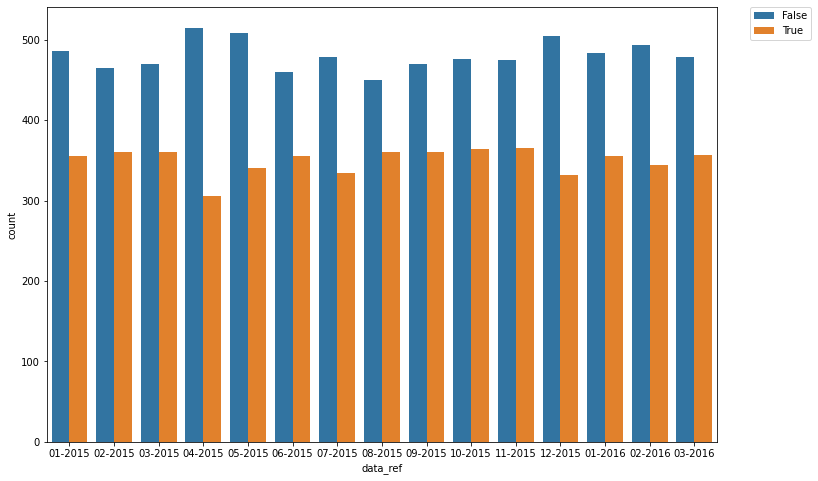

In [55]:

ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=renda)
ax.figure.set_size_inches(12,8)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


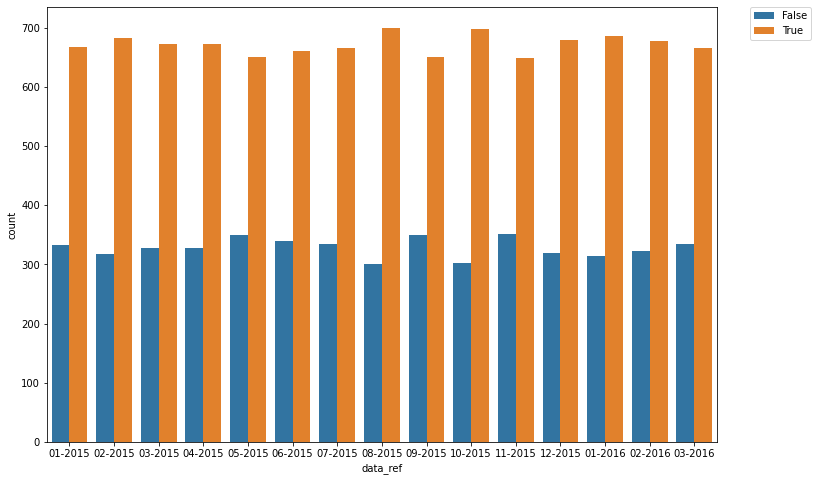

In [44]:

ax = sns.countplot(x='data_ref',  hue = 'posse_de_imovel', data=renda)
ax.figure.set_size_inches(12,8)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

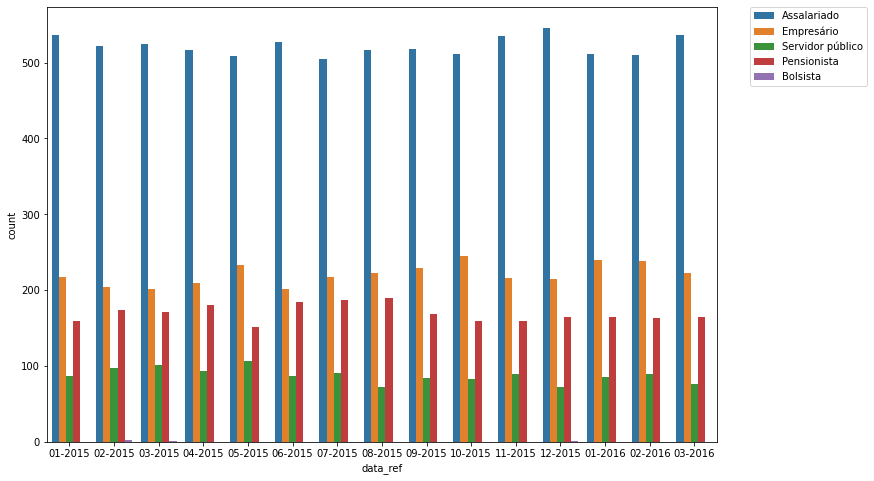

In [45]:

ax = sns.countplot(x='data_ref',  hue = 'tipo_renda', data=renda)
ax.figure.set_size_inches(12,8)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

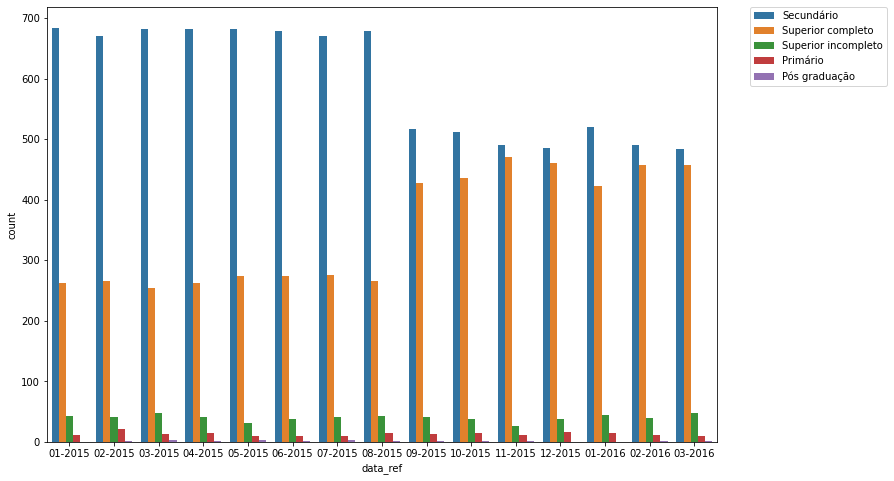

In [46]:

ax = sns.countplot(x='data_ref',  hue = 'educacao', data=renda)
ax.figure.set_size_inches(12,8)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

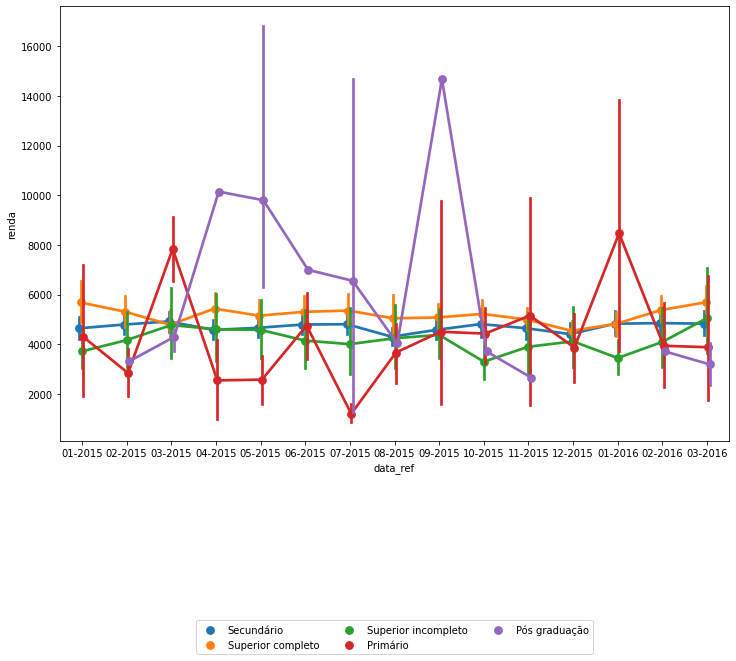

In [74]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'educacao',
                   data=renda, dodge=True, ci = 95)
ax.figure.set_size_inches(12,8)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)


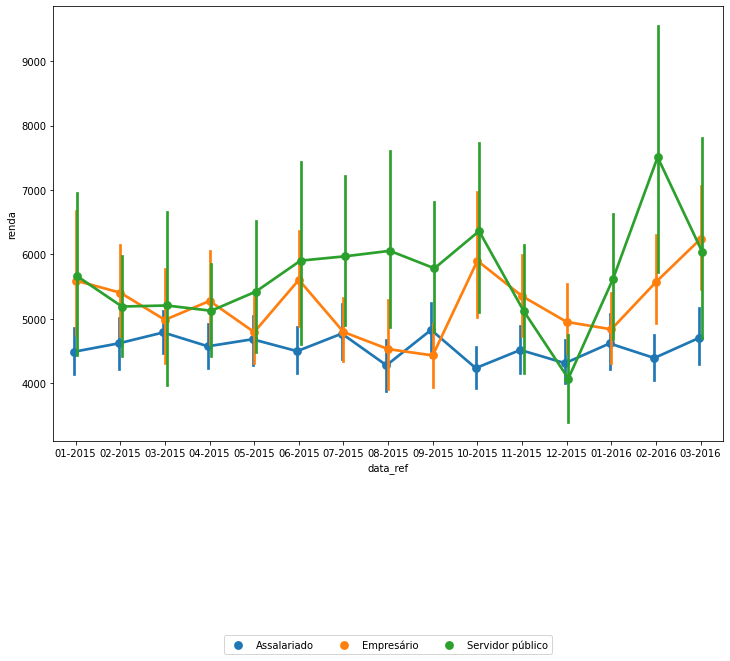

In [75]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'tipo_renda',
                   data=renda, dodge=True, ci = 95)
ax.figure.set_size_inches(12,8)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)


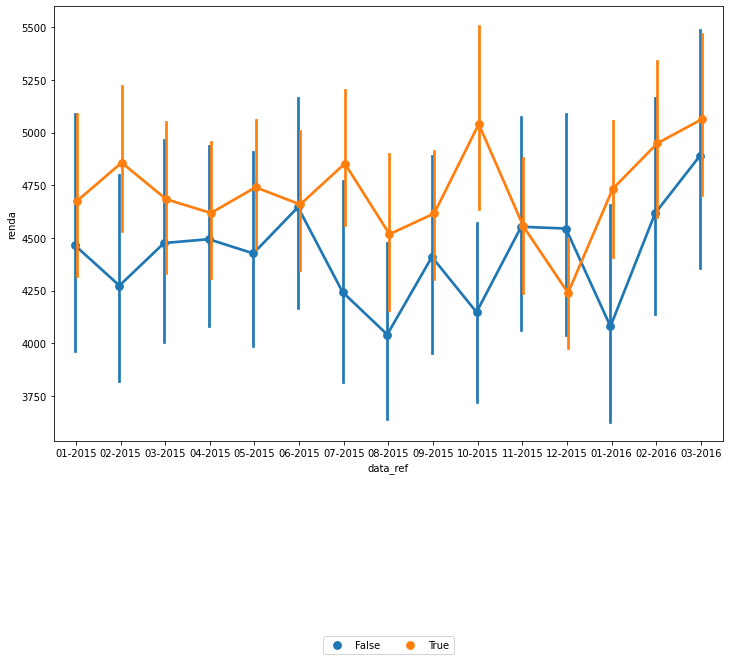

In [51]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_imovel',
                   data=renda, dodge=True, ci = 95)
ax.figure.set_size_inches(12,8)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)


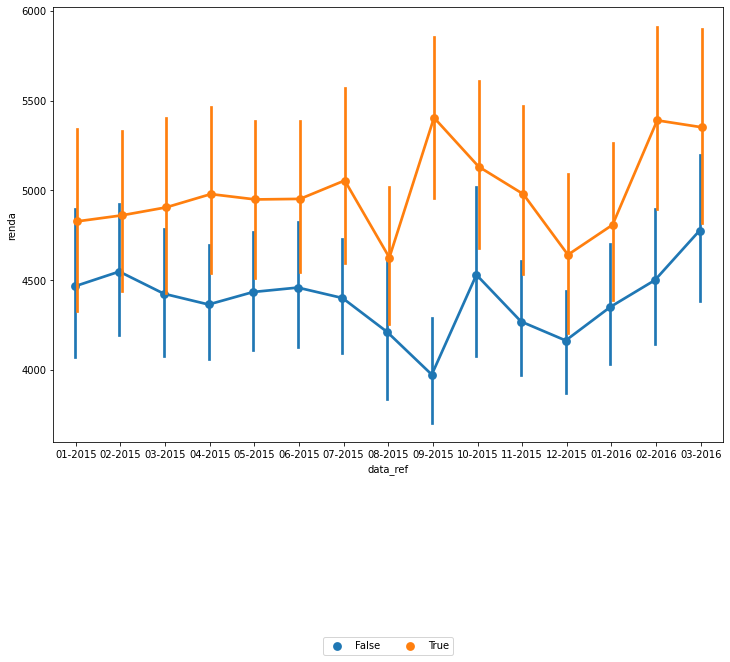

In [52]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_veiculo',
                   data=renda, dodge=True, ci = 95)
ax.figure.set_size_inches(12,8)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)


Tirando a variavel Educacao, acredito que as outras se mativeram estavel.